Part 1. Using Naïve Bayes to work with Text Data


1.) Representing text as data

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

vector = CountVectorizer()
vector.fit(simple_train)
vector.get_feature_names()

['cab', 'call', 'me', 'please', 'tonight', 'you']

In [45]:
# Transform training data into a 'document-term matrix' (which is a sparse matrix).
simple_train_dtmatrix = vector.transform(simple_train)


In [46]:
# Printing Sparse Matrix
print("Sparse Matrix")
print(simple_train_dtmatrix)

Sparse Matrix
  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [47]:
#Convert the sparse matrix to a dense matrix
print("Convert the sparse matrix to a dense matrix")
print(simple_train_dtmatrix.toarray())


Convert the sparse matrix to a dense matrix
[[0 1 0 0 1 1]
 [1 1 1 0 0 0]
 [0 1 1 2 0 0]]


In [48]:
#Examine the vocabulary and document-term matrix together
pd.DataFrame(simple_train_dtmatrix.toarray(), columns = vector.get_feature_names())


,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [49]:

simple_test = ["please don't call me"]

# transforming simpletest_data into a document-term matrix,
simple_test_dtm = vector.transform(simple_test)
simple_test_dtm.toarray()

# examine the vocabulary and document-term matrix together
print("Examining the vocabulary and document-term matrix together")
pd.DataFrame( simple_test_dtm.toarray(), columns = vector.get_feature_names() )

Examining the vocabulary and document-term matrix together


,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


2.) Analyzing SMS data with Naïve Bayes 

In [50]:
# Read into the data from the file “sms.tsv”; give the names of columns as ['label', 'message']; and print the first 10 samples to view part of the data.
message = pd.read_table('sms.tsv', header = None, names = ['label', 'message'])
message.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [51]:
#Convert label to a numeric variable.
message['label_num'] = message.label.map({'ham':0, 'spam':1})
message.head(10)

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [52]:
#Then define the X and y

X = message.message
y = message.label_num

print(X.shape)
print(y.shape)


(5572,)
(5572,)


In [53]:
#Split into training and testing sets by train_test_split(); and print the shape of training set and test set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print("Train Data Set:")
print(X_train.shape)
print(y_train.shape)
print("Test Data Set:")
print(X_test.shape)
print(y_test.shape)


Train Data Set:
(4179,)
(4179,)
Test Data Set:
(1393,)
(1393,)


In [54]:
#Use the two Naïve Bayes models (GaussianNB and MultinomialNB) to finish the following requirements, respectively:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Vectorizing Dataset
vector = CountVectorizer()

# Coverting train & test data to Document Term Matrix 
vector.fit(X_train)
X_TRAIN_DTM = vector.transform(X_train)
X_TEST_DTM =  vector.transform(X_test)

# Multinomial NaiveBayes Model
m_NB=MultinomialNB()

# Training the model using X_TRAIN_DTM
m_NB.fit(X_TRAIN_DTM,y_train)

# Prediction for X_TEST_DTM
y_PREDICTION = m_NB.predict(X_TEST_DTM)

# Accuracy Score Estimation - Gaussian Naive bayes
print("Accuracy Score:",metrics.accuracy_score(y_test, y_PREDICTION))

# Confusion Matrix
print("\n Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_PREDICTION))

# print message text for the false positives (ham incorrectly classified as spam)
print('\n false positives')
print(X_test[(y_PREDICTION == 1) & (y_test == 0)])

# print message text for the false negatives (spam incorrectly classified as ham)
print('\n false negatives')
print(X_test[y_PREDICTION < y_test])



Accuracy Score: 0.9885139985642498

 Confusion Matrix:
[[1203    5]
 [  11  174]]

 false positives
574               Waiting for your call.
3375             Also andros ice etc etc
45      No calls..messages..missed calls
3415             No pic. Please re-send.
1988    No calls..messages..missed calls
Name: message, dtype: object

 false negatives
3132    LookAtMe!: Thanks for your purchase of a video...
5       FreeMsg Hey there darling it's been 3 week's n...
3530    Xmas & New Years Eve tickets are now on sale f...
684     Hi I'm sue. I am 20 years old and work as a la...
1875    Would you like to see my XXX pics they are so ...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
2821    INTERFLORA - It's not too late to order Inter...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: mess

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Vectorizing Dataset
vector = CountVectorizer()

X_TRAIN_DTM = vector.fit_transform(X_train)
X_TEST_DTM =  vector.transform(X_test)

# Gaussian NaiveBayes Model
g_NB=GaussianNB()

# Training the model using X_TRAIN_DTM
g_NB.fit(X_TRAIN_DTM.toarray(),y_train)

# Prediction for X_TEST_DTM
y_PREDICTION = g_NB.predict(X_TEST_DTM.toarray())

# Accuracy Score Estimation - Multinomial Naive bayes
print("Accuracy Score:",metrics.accuracy_score(y_test, y_PREDICTION))

# Confusion Matrix
print("\n Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_PREDICTION))


# print message text for the false positives 
print('\n false positive:')
print(X_test[(y_PREDICTION == 1) & (y_test == 0)])


# print message text for the false negatives 
print('\n false negatives:')
print(X_test[y_PREDICTION < y_test])



Accuracy Score: 0.8994974874371859

 Confusion Matrix:
[[1079  129]
 [  11  174]]

 false positive:
3465                                             My phone
1242    I want to show you the world, princess :) how ...
3214                                       What's ur pin?
574                                Waiting for your call.
4487                                 have * good weekend.
                              ...                        
2285                              Velly good, yes please!
2155    Oh god i am happy to see your message after 3 ...
1925                                                   Ok
1988                     No calls..messages..missed calls
3207                                        At home also.
Name: message, Length: 129, dtype: object

 false negatives:
3530    Xmas & New Years Eve tickets are now on sale f...
1875    Would you like to see my XXX pics they are so ...
349     Fancy a shag? I do.Interested? sextextuk.com t...
1893    CALL 09090900040 & 

Part-2) Analyzing Boston housing

In [56]:
#Importing Boston Housing Data
from sklearn.datasets import load_boston 
import numpy as np
import matplotlib.pyplot as plot 
import pandas as pd  
import seaborn as sb 


In [57]:
# Loading dataset
bos_dataset = load_boston()
#Preprocessing Dataset
bos_dataset = pd.DataFrame(bos_dataset.data)
bos_dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [58]:
# Checking for null values in the data series ( Data Preprocessing)
bos_dataset.isnull().sum()
# The given data is clean from Null & Missing Values

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

<AxesSubplot:>

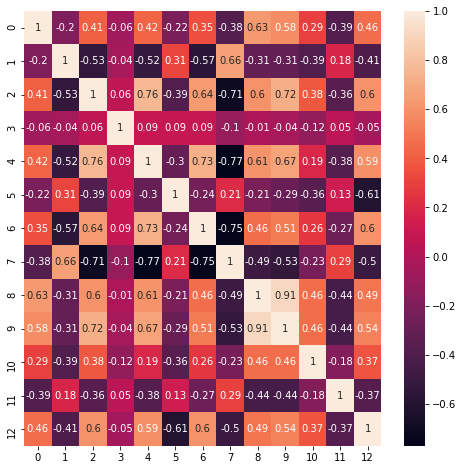

In [59]:
# Correleation Matrix for non labelled data
f, ax = plot.subplots(figsize=(8,8))
corr_matrix = bos_dataset.corr().round(2)
sb.heatmap(data=corr_matrix, annot=True)

In [60]:
# Defining Columns
bos_data = load_boston()
bos_data['PRICE'] = bos_data.target 
bos_dataset = pd.DataFrame(bos_data.data, columns = bos_data.feature_names)


<AxesSubplot:>

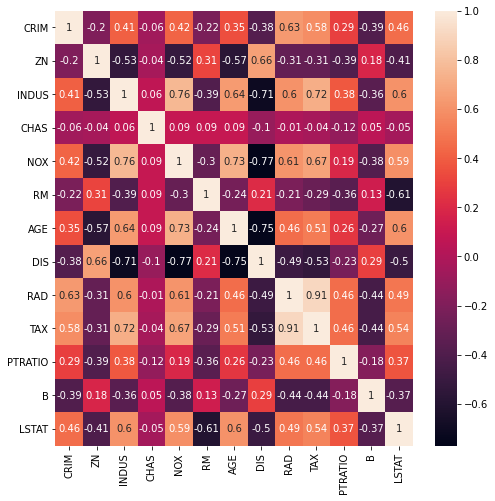

In [61]:
f, ax = plot.subplots(figsize=(8, 8))
corr_matrix = bos_dataset.corr().round(2)
sb.color_palette("Set2")
sb.heatmap(data=corr_matrix, annot=True)

Text(0.5, 1.0, 'Diagonal Correlation HeatMap')

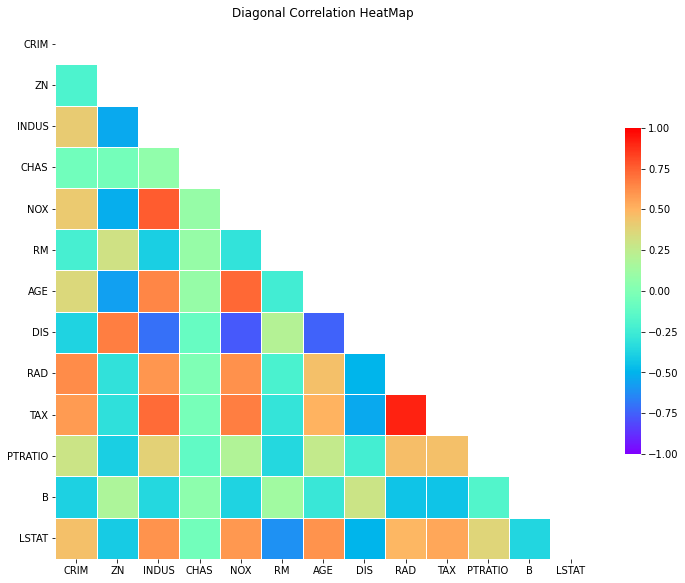

In [62]:
f, ax = plot.subplots(figsize=(12, 12))
corr = bos_dataset.corr()

# TO display diagonal matrix instead of full matrix.
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
 
# Generate a custom diverging colormap.
cmap = sb.color_palette('rainbow',9,as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio.
g = sb.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin =-1,center=0, fmt='.2f',\
square=True, linewidths=.5, cbar_kws={"shrink": .5})
 
# plt.subplots_adjust(top=0.99)
plot.title("Diagonal Correlation HeatMap")

5.) Highly Correlated - TAX & RAD,
    Highly Un-Correlated - DIS & NOX

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Step 1: Preprocessing & Splitting Data for Testing & Training 
print(bos_dataset.isnull().values.any())  

#Splitting 80 % of dataset to train data & remaining 20% to test data
X_train, X_test, y_train, y_test = train_test_split(bos_data.data, bos_data.target, test_size = 0.2, random_state=5)



False


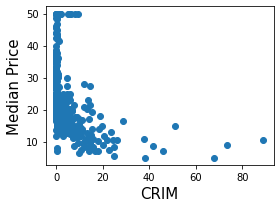

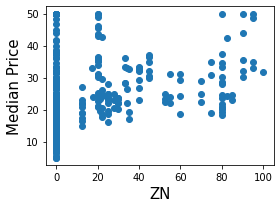

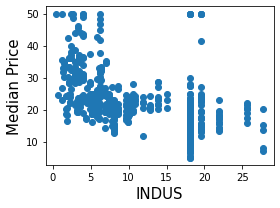

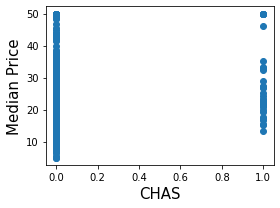

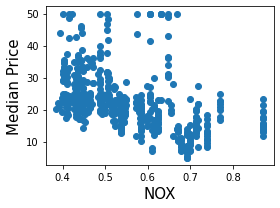

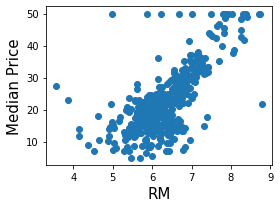

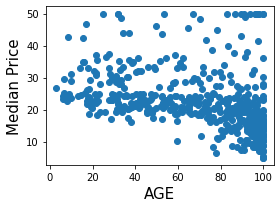

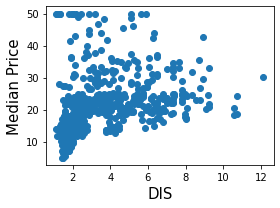

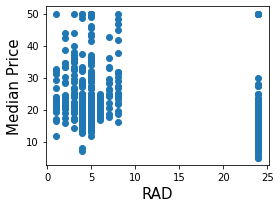

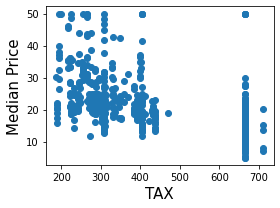

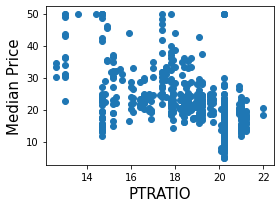

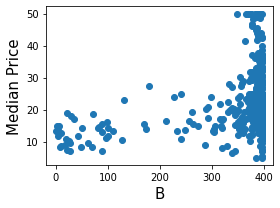

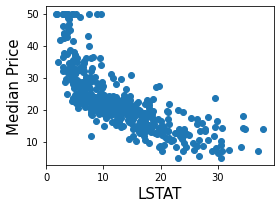

In [64]:
# Step 2: 
# Exploratory Data Analysis - Comparing Feature vs Median(MEDV) Pricing Relationship 

for index, feature_name in enumerate(bos_data.feature_names):
    plot.figure(figsize=(4, 3))
    plot.scatter(bos_data.data[:, index], bos_data.target)
    plot.ylabel('Median Price', size=15)
    plot.xlabel(feature_name, size=15)
    plot.tight_layout()


In [65]:
# Step 3 - Machine learning (modeling)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

features = bos_data.feature_names
coeffcients = pd.DataFrame([features,lin_model.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.1308
1,ZN,0.049403
2,INDUS,0.001095
3,CHAS,2.705366
4,NOX,-15.95705
5,RM,3.413973
6,AGE,0.001119
7,DIS,-1.493081
8,RAD,0.364422
9,TAX,-0.013172


In [66]:
# Step 4
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
mean_sqare_err = mean_squared_error(y_train, y_train_predict)
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set:")
print('MSE is {}'.format(mean_sqare_err))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
mean_sqare_err = mean_squared_error(y_test, y_test_predict)
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set:")
print('MSE is {}'.format(mean_sqare_err))
print('R2 score is {}'.format(r2))

The model performance for training set:
MSE is 22.477090408387628
R2 score is 0.738339392059052


The model performance for testing set:
MSE is 20.86929218377053
R2 score is 0.7334492147453111


(a) What do the metrics of R Squared and Mean Squared Error? What are the numbers telling you?

MSE & r-squared are highly correlated to each other. They determine how close the actual & predicted data points are close to the regression line.

Mean Sqaured Error - Mean Squared Error is the average of the squared difference between the original and predicted values in the data set. Generally, It provides us the variance of residual data. Computation of this value is based on error in the model. Larger the number , larger the error.

R Squared - It is also known as coefficient of determination, measures how close the predicted data fits near to the actual regression line. High R Squared values means that model is strong. 

(b) Improvements to model: 
 
-> The R Squared value  is above +0.7 this model gives us positive linear relationship. Generally a score of 0.8 considered as strong effect. But in our case the model has a moderate to strong effect.
-> Mean square error value is resonably lower, but still there is some degree of error in the model. For, Ideal condition the MSE must zero
-> Though this model is not bad, we can apply some optimization/regularization tecqniques such as lasso & ridge regression to get better results 
-> Another way to optimize would be to remove the outliers in the existing model & create new set of features that are highly correlated each other. New model could substansially might improve the score of R squared, which eventually increses the quality of the predicted model  
-> Can use methods such as logistic regression instead of linear regression inorder to minimize the mean square error

3.) Predicting BiCycle Traffic

1.) Load the two datasets, indexing by date. Explore the two datasets by showing size, shape and first several samples with features, etc..

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

cycle_count = pd.read_csv('BridgeBicycle.csv',index_col='Date',parse_dates=True)
weather_data = pd.read_csv('BridgeWeather.csv', index_col='DATE', parse_dates=True)


In [68]:
# Samples of Data
print(cycle_count.head())
print(weather_data.tail())

# Shape
print("\n")
print("Cycle Count Data Shape:",cycle_count.shape)
print("Weather Data Shape:",weather_data.shape)
print("\n")
# Size
print("Cycle Count Data Size",cycle_count.size)
print("Weather Data Size",weather_data.size)



                     Fremont Bridge East Sidewalk  \
Date                                                
2019-02-28 23:00:00                           5.0   
2019-02-28 22:00:00                           4.0   
2019-02-28 21:00:00                          16.0   
2019-02-28 20:00:00                          16.0   
2019-02-28 19:00:00                          39.0   

                     Fremont Bridge West Sidewalk  
Date                                               
2019-02-28 23:00:00                           6.0  
2019-02-28 22:00:00                          27.0  
2019-02-28 21:00:00                          32.0  
2019-02-28 20:00:00                          50.0  
2019-02-28 19:00:00                          59.0  
                STATION                                         NAME  \
DATE                                                                   
2019-02-24  USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US   
2019-02-25  USW00024233  SEATTLE TACOMA INTERNAT

2.) Compute the total daily bicycle traffic as a new dataframe.


In [69]:
# cycle_count['Total Bicycle_Count'] = cycle_count['Fremont Bridge East Sidewalk'] + cycle_count['Fremont Bridge West Sidewalk']
# cycle_count.head()

tot_cycle_count = cycle_count.resample('d').sum()
tot_cycle_count['Total'] = cycle_count.sum(axis=1)
tot_cycle_count = tot_cycle_count[['Total']]
tot_cycle_count

,Total
Date,
2012-10-03,13.0
2012-10-04,18.0
2012-10-05,11.0
2012-10-06,15.0
2012-10-07,11.0
...,...
2019-02-24,9.0
2019-02-25,2.0
2019-02-26,5.0


3.) Add binary columns that indicate the day of the week (Monday to Sunday) to account for the patterns of bike use that vary every day.


In [70]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    tot_cycle_count[days[i]] = (tot_cycle_count.index.dayofweek == i).astype(float)
tot_cycle_count    

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,13.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,18.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,11.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,15.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2019-02-24,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2019-02-25,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-26,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


4.) Similarly, add an indicator to show the behavior of the riders on holidays (Federal holidays).

In [71]:
from pandas.tseries.holiday import USFederalHolidayCalendar
holiday_calendar = USFederalHolidayCalendar()
holidays = holiday_calendar.holidays('2012', '2016')
tot_cycle_count = tot_cycle_count.join(pd.Series(1, index=holidays, name='holiday'))
tot_cycle_count['holiday'].fillna(0, inplace=True)
tot_cycle_count

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,13.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,18.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,11.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,15.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-07,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
2019-02-24,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-02-25,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-26,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


5.) Add the average temperature and total precipitation to the data. In addition to the centimeters of precipitation, add a flag that indicates whether a day is dry (has zero precipitation).

In [72]:
# Convert to Temperature Max & Min to Average Temperature in Celcius
# weather_data['TMIN'] /= 10
# weather_data['TMAX'] /= 10
weather_data['Temp (C)'] = 0.5 * (weather_data['TMIN'] + weather_data['TMAX'])

# Converting precipitation (cm) to (inches)
weather_data['PRCP'] /= 25.4
weather_data['Dry_Days'] = (weather_data['PRCP'] == 0).astype(int)



6.) Combine the three columns in weather dataframe (PRCP, average temperature, and dry days) into the new bicycle dataframe in question 2.


In [73]:
tot_cycle_count = tot_cycle_count.join(weather_data[['PRCP', 'Temp (C)', 'Dry_Days']])
tot_cycle_count.head(30)

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,PRCP,Temp (C),Dry_Days
Date,,,,,,,,,,,,
2012-10-03,13.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,56.0,1
2012-10-04,18.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,56.5,1
2012-10-05,11.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,59.5,1
2012-10-06,15.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,60.5,1
2012-10-07,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,60.5,1
2012-10-08,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,58.0,1
2012-10-09,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,54.5,1
2012-10-10,15.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,50.5,1
2012-10-11,21.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,51.0,1


7.) Add a counter that increases from day 1, and measures how many years have passed.


In [74]:
tot_cycle_count['annual'] = (tot_cycle_count.index - tot_cycle_count.index[0]).days / 365.
tot_cycle_count

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,PRCP,Temp (C),Dry_Days,annual
Date,,,,,,,,,,,,,
2012-10-03,13.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,56.0,1,0.000000
2012-10-04,18.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,56.5,1,0.002740
2012-10-05,11.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,59.5,1,0.005479
2012-10-06,15.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,60.5,1,0.008219
2012-10-07,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,60.5,1,0.010959
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-24,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000394,39.5,0,6.397260
2019-02-25,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,38.0,1,6.400000
2019-02-26,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,36.5,1,6.402740


8.) Make sure the data is clean: drop any rows with null values
The final column names for “feature matrix” should be:

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday', 'PRCP', 'dry day', 'Temp', 'annual']

In [75]:
# Drop any rows with null values
tot_cycle_count.dropna(axis=0, how='any', inplace=True)

feature = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday', 'PRCP', 'Dry_Days', 'Temp (C)', 'annual']
x = tot_cycle_count[feature]
target = tot_cycle_count['Total']


9.)Fit a linear regression model to the ready data. And compare the total and predicted bicycle traffic visually.


In [76]:
bicycle_model = LinearRegression(fit_intercept=False)
bicycle_model.fit((X_train,y_train)
             
# tot_cycle_count['predicted'] = bicycle_model.predict(x)

# tot_cycle_count[['Total', 'predicted']].plot(alpha=0.9)

SyntaxError: unexpected EOF while parsing (<ipython-input-76-abec93ede5fd>, line 6)

In [ ]:
y_pred = bicycle_model.predict(x)

y_pred

10.) Output the coefficients of the linear model to estimate how much each feature contributes to the daily bicycle count.


In [ ]:
coeffcients = pd.DataFrame([feature,bicycle_model.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

